In [3]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as pim

Primeiro iremos ler uma imagem e plota-la sem nenhuma alteração, utilizando a leitura de imagens da biblioteca matplotlib.

In [4]:
path = './files/FOTOS/'

In [5]:
img = pim.imread(path+'lena.png')

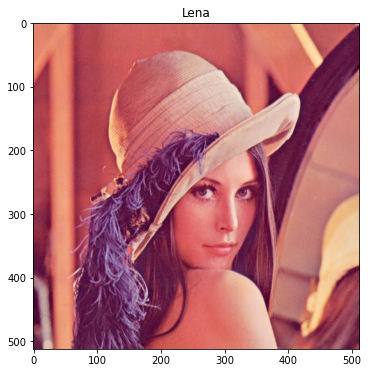

In [6]:
plt.figure(figsize=(6,6))
plt.title("Lena")
plt.imshow(img)
plt.show()

In [7]:
h, w, nc = img.shape
print(img.shape, img.dtype)
print(f'w={w}, h={h}, numero de canais de cor={nc}')
print(f'min={np.amin(img)}, max={np.amax(img)}')

(512, 512, 4) float32
w=512, h=512, numero de canais de cor=4
min=0.0, max=1.0


A imagem consiste de um numpy array com tres canais de cor, vermelho, verde e azul. Esses valores já estão normalizados em floats de 32 bits, indo de 0.0 (intensidade mínima) a 1.0 (intensidade máxima), conforme demonstrado na cela acima.

In [8]:
imga = img*255
imga = imga.astype(int)
print(imga.shape, imga.dtype)
print(f'min={np.amin(imga)}, max={np.amax(imga)}')

(512, 512, 4) int32
min=0, max=255


Para acompanhar a análise feita no vídeo, podemos inverter o processo, multiplicando a imagem por 255 e convertendo-a para int. Ficamos dessa maneira com um valor mínimo de 0 e máximo de 255. Análogamente ao vídeo, podemos observar que a imagem é igual para ambos os formatos.

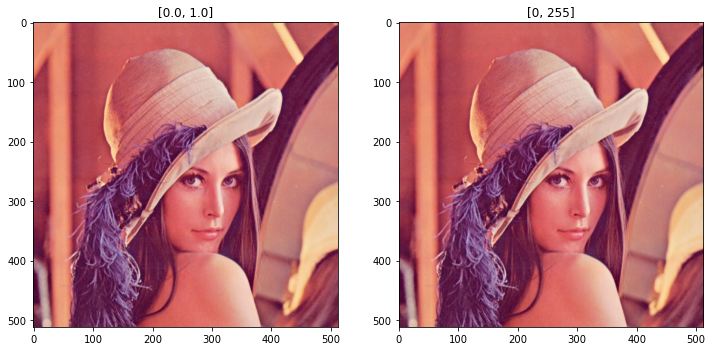

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title("[0.0, 1.0]")
axes[0].imshow(img)
axes[1].set_title("[0, 255]")
axes[1].imshow(imga)
plt.show()

Ao aplicar as proporções de luminância relativas a cada uma das três cores e realizando um color mapping da imagem para "gray", obtemos uma versão cinza da imagem.

(512, 512)


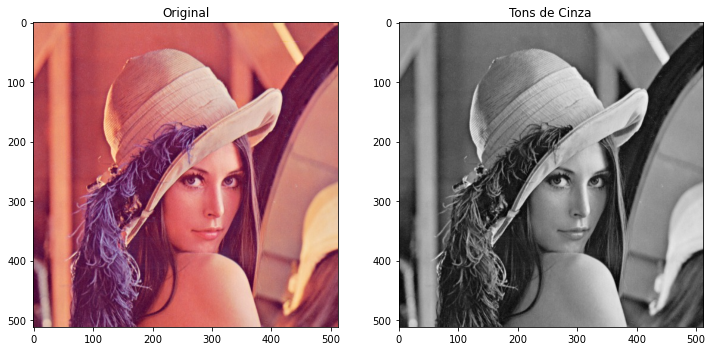

In [47]:
def lum(rgb):
    return np.dot(rgb, [0.2126, 0.7152, 0.0722, 0])

gray = lum(img)
print(gray.shape)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title("Original")
axes[0].imshow(imga)
axes[1].set_title("Tons de Cinza")
axes[1].imshow(gray, cmap="gray")

plt.show()

In [33]:
print(gray.ravel().min())
print(gray.ravel().max())

0.058910588967800145
0.9577960809469223


Abaixo plotamos um histograma com a distribuição de cores dos pixels na imagem, entre 0.0 e 1.0. Podemos observar uma maior concentração de pixels nas cores entre 0.1 e 0.2, entre 0.3 e 0.4 e entre 0.45 e 0.6.

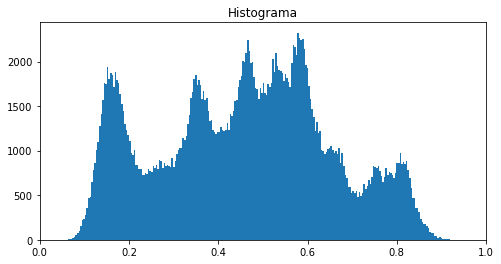

In [49]:
plt.figure(figsize=(8,4))
plt.title("Histograma")
plt.hist(gray.ravel(), 255)
plt.xlim([0, 1])
plt.show()

Abaixo plotamos as ocorrências dos três canais de cor, vermelho, verde e amarelo no gráfico. Podemos notar uma predominância do canal vermelho sobre as outras cores. Isso faz sentido, dado que a imagem de fato tem um tom avermelhado.

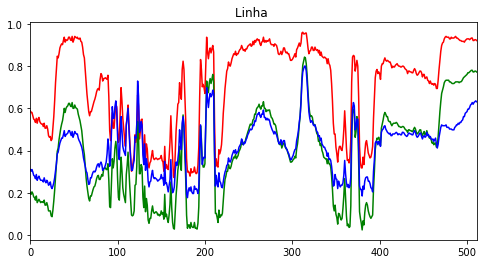

In [57]:
x = np.linspace(0, w-1, w)
plt.figure(figsize=(8,4))
plt.title("Linha ")
plt.plot(x, img[300,:,0], "red")
plt.plot(x, img[300,:,1], "green")
plt.plot(x, img[300,:,2], "blue")
plt.xlim([0, w-1])
plt.show()